<h1>Extracting Stock Data Using a Python Library</h1>

A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 



## Table of Contents

- Using yfinance to Extract Stock Info
- Using yfinance to Extract Historical Share Price Data
- Using yfinance to Extract Historical Dividends Data
- Exercise


### Install libraries

In [1]:
!pip install yfinance
!pip install matplotlib
!pip install pandas 
!pip install requests

In [2]:
# The Requried libraries for this yfinance stock analysis are:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import requests
import urllib.request

## Using the yfinance Library to Extract Stock Data

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
# Create Ticker object for Apple
apple = yf.Ticker("AAPL")  # Correct ticker symbol

In [4]:
# Download file using python 

# Provide url
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"

# Send requests and download file
response = requests.get(url)

# Save the file 

with open("apple.json", "wb") as file:
    file.write(response.content)

In [5]:
# Download file using python another way and fast

import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
urllib.request.urlretrieve(url, "apple.json")

print("Download Completed")

Download Completed


In [6]:
# check file exists

import os
print(os.path.exists("apple.json"))

True


# Stock Info

Using the attribute `info` we can extract information about the stock as a Python dictionary.

In [7]:
import json 
with open("apple.json") as json_file:
    apple_info = json.load(json_file)
    
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the `country` using the key country

In [8]:
apple_info["country"]

'United States'

### Extracting Share Price

A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the `history()` method we can get the share price of the stock over a certain `period` of time. Using the period parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [9]:
apple_share_history = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock` `Splits` are given for each day.

In [10]:
apple_share_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098389,0.098817,0.098389,0.098389,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093684,0.093684,0.093256,0.093256,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.086839,0.086839,0.086412,0.086412,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088550,0.088978,0.088550,0.088550,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091118,0.091545,0.091118,0.091118,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

In [11]:
apple_share_history_reset = apple_share_history.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:

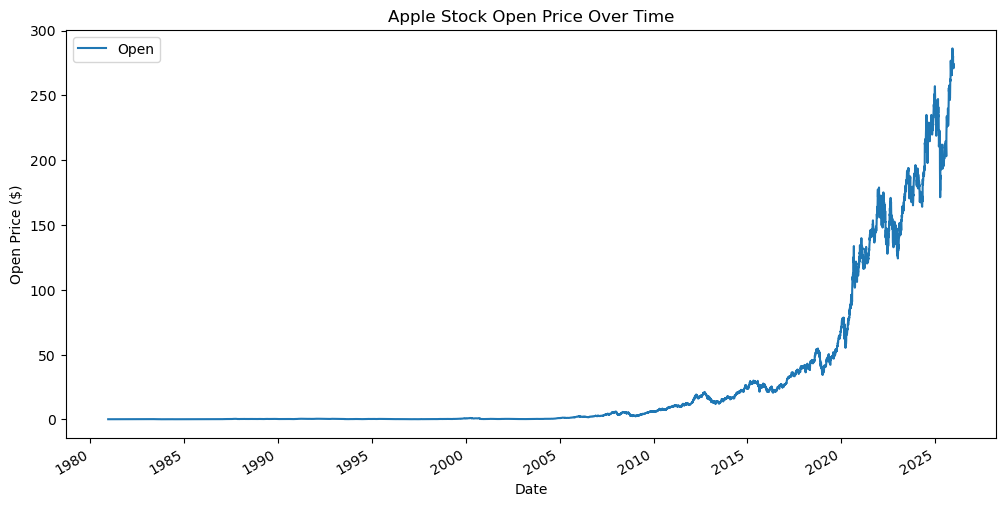

In [12]:
import matplotlib.pyplot as plt

apple_share_history_reset = apple_share_history.reset_index()

apple_share_history_reset.plot(
    x="Date",
    y="Open",
    figsize=(12, 6),
    title="Apple Stock Open Price Over Time"
)

plt.xlabel("Date")
plt.ylabel("Open Price ($)")
plt.show()


### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the `history` function.

In [13]:
apple_dvnds = apple.dividends

In [14]:
apple_dvnds

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
2025-08-11 00:00:00-04:00    0.260000
2025-11-10 00:00:00-05:00    0.260000
Name: Dividends, Length: 89, dtype: float64

We can plot the dividends overtime. 

<Axes: xlabel='Date'>

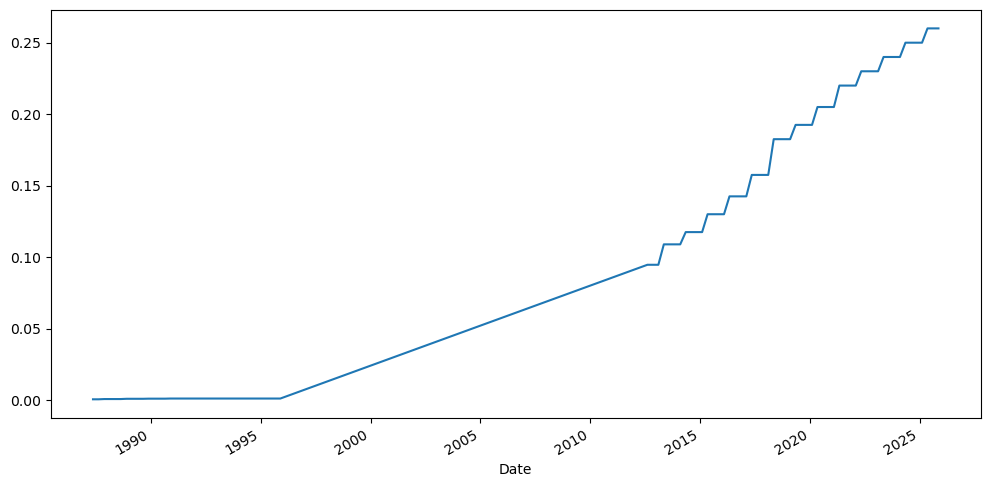

In [30]:
apple_dvnds.plot(figsize= (12,6))

## Exercise

Now using the `Ticker` module create an object for AMD(Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object `amd`.

In [15]:
import yfinance as yf
amd = yf.Ticker("AMD")
amd

yfinance.Ticker object <AMD>

In [16]:
# Download file using python 
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json"

# Send requests and download file
response = requests.get(url)

# Save the file
with open("amd.json", "wb") as file:
    file.write(response.content)


In [ ]:
# Download file using python another way and fast

import urllib.request
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json"

# Save the file 

urllib.request.urlretrieve(url, "amd.json")

print("Download Complete")

In [41]:
import os
print(os.path.exists("amd.json"))

True


In [42]:
import json 

with open("amd.json") as json_file:
    amd_info = json.load(json_file)

amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

<b>Question 1</b> Use the key `country` to find the country the stock belongs to, remember it as it will be a quiz question.

In [48]:
amd_info["country"]

'United States'

<b>Question 2</b> Use the key `sector` to find the sector the stock belongs to, remember it as it will be a quiz question.

In [50]:
amd_info["sector"]

'Technology'

<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).

In [51]:
amd_share_history =  amd.history(period="max")

In [52]:
amd_share_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,3.125000,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,3.125000,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,3.031250,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,3.041667,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,3.010417,3.020833,2.906250,2.916667,130800,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-19 00:00:00-05:00,204.600006,215.179993,204.199997,213.429993,58445500,0.0,0.0
2025-12-22 00:00:00-05:00,220.000000,220.169998,213.309998,214.949997,24950700,0.0,0.0
2025-12-23 00:00:00-05:00,212.860001,217.029999,212.279999,214.899994,20272300,0.0,0.0


In [55]:
# Find the Volume 

amd_share_history.iloc[0]['Volume']

219600.0

## Authors:

JIKIRIYA